In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
opsd_daily = pd.read_csv("C:/Users/USX28939/Downloads/opsd_germany_daily_time_series_data.csv")

In [3]:
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [8]:
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [9]:
opsd_daily.shape

(4383, 5)

In [10]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [11]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [13]:
opsd_daily["Date"]= pd.to_datetime(opsd_daily["Date"], format = '%Y-%m-%d')

In [14]:
opsd_daily.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [15]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


Alternatively, we can consolidate the above steps into a single line, using the index_col and parse_dates parameters of the read_csv() function. This is often a useful shortcut.

In [16]:
opsd_daily = pd.read_csv("C:/Users/USX28939/Downloads/opsd_germany_daily_time_series_data.csv", 
                         index_col=0, parse_dates=True)

In [17]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [18]:
opsd_daily.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [20]:
opsd_daily.index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4383)

In [21]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [34]:
opsd_daily.loc['2017']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-01-01,1130.41300,307.125,35.291,342.416,2017,1,Sunday
2017-01-02,1441.05200,295.099,12.479,307.578,2017,1,Monday
2017-01-03,1529.99000,666.173,9.351,675.524,2017,1,Tuesday
2017-01-04,1553.08300,686.578,12.814,699.392,2017,1,Wednesday
2017-01-05,1547.23800,261.758,20.797,282.555,2017,1,Thursday
2017-01-06,1501.79500,115.723,33.341,149.064,2017,1,Friday
2017-01-07,1405.14500,252.307,8.387,260.694,2017,1,Saturday
2017-01-08,1301.01100,41.261,4.991,46.252,2017,1,Sunday
2017-01-09,1604.34800,190.983,7.070,198.053,2017,1,Monday


In [27]:
sns.set(rc={'figure.figsize':(11, 4)})

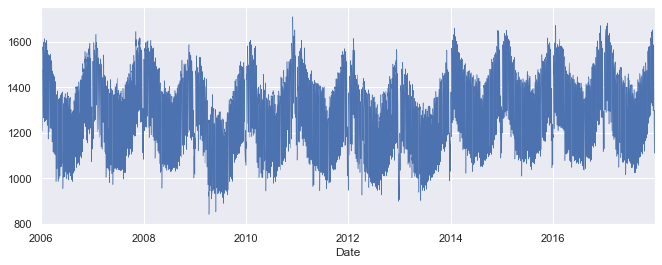

In [28]:
#plt.figure(figsize=(11,4))
opsd_daily['Consumption'].plot(linewidth=0.5);

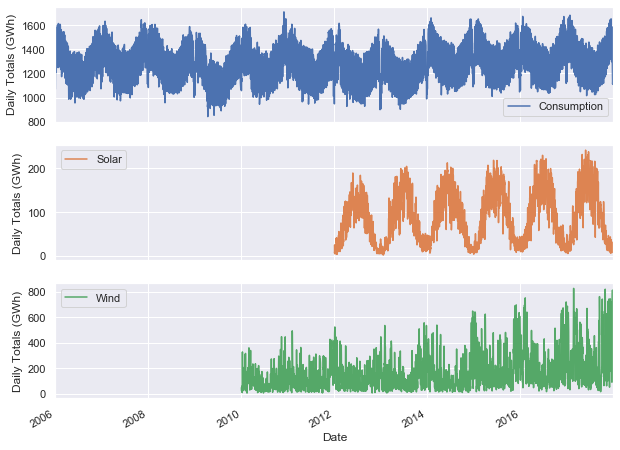

In [33]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot( subplots=True, figsize = (10,8))
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

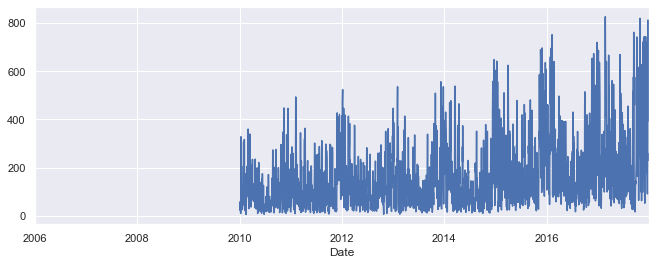

In [37]:
opsd_daily["Wind"].plot()

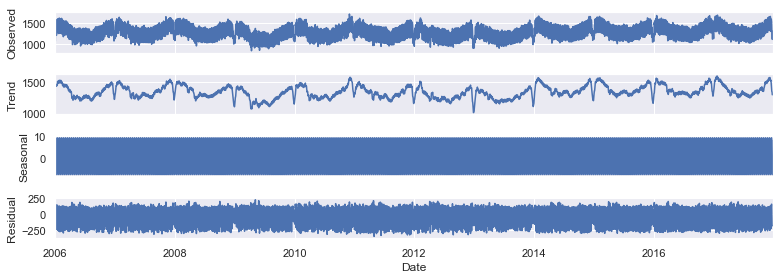

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
result = seasonal_decompose(opsd_daily["Consumption"], model='additive', freq=12)
result.plot()
pyplot.show()

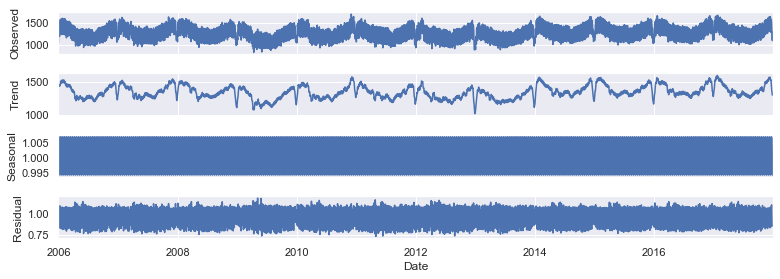

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
result = seasonal_decompose(opsd_daily["Consumption"], model='multiplicative', freq=12)
result.plot()
pyplot.show()